<a href="https://colab.research.google.com/github/rizkyirw/Titanic-EDA/blob/main/Titanic_Isro'_Rizky_W_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("/content/drive/MyDrive/titanic.csv")

df.shape

(891, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Cleaning

In [15]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [16]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

### Checking NaN Values

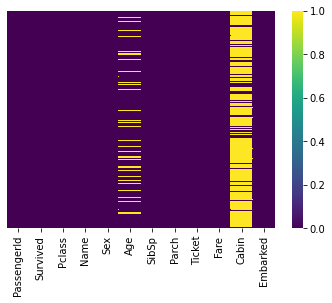

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

### Handling Missing Values

Dapat dilihat bahwa pada kolom kabin terdapat banyak sekali NaN values, kita dapat menghapus kolom `Cabin` agar visualisasi dapat dibuat secara maksimal. Untuk NaN `Age` dapat difill menggunakan nilai rata-rata dengan referensi dari nilai PClass.

In [18]:
# Remove 'Cabin'
df.drop(['Cabin'],inplace=True,axis=1)

In [121]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Plotting Boxplot kolom `Age` dengan `Pclass`

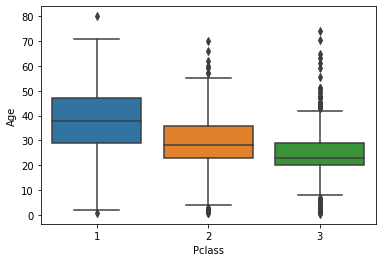

In [49]:
sns.boxplot(y='Age',x='Pclass',data=df)

Nilai median dari pada boxplot `Age` : 
- Pclass 1 = 38
- Pclass 2 = 28
- Pclass 3 = 23

In [21]:
#Fill NaN pada kolom Age

def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 28
        else:
            return 23
    else:
        return Age

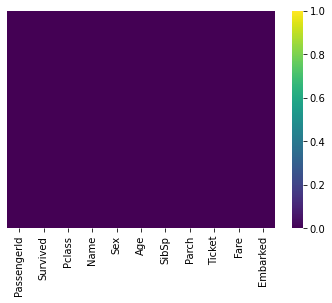

In [106]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

## Data Visualization

### Jumlah penumpang `Survived` dan Not `Survived` berdasarkan `'Pclass','Sex','Parch','Embarked'`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


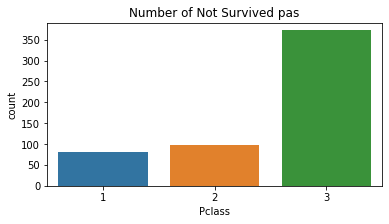

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


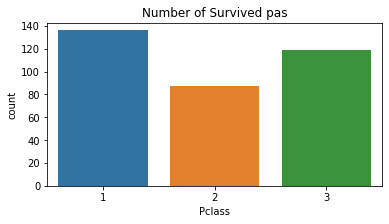

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


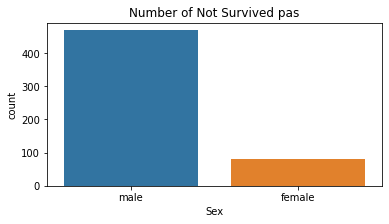

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


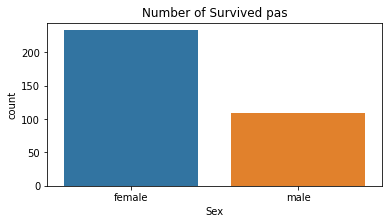

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


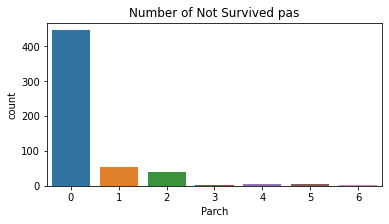

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


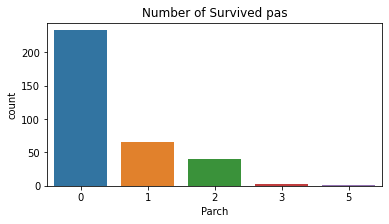

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


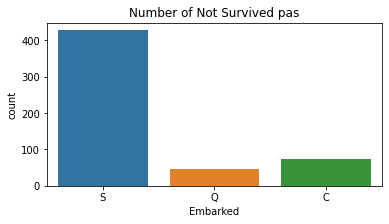

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


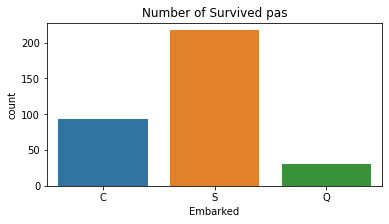

In [107]:
for col in ['Pclass','Sex','Parch','Embarked']:
    plt.figure(figsize=(6,3))
    sns.countplot(df[col][df.Survived==0])
    plt.title('Number of Not Survived pas')
    plt.show()
    plt.figure(figsize=(6,3))
    sns.countplot(df[col][df.Survived==1])
    plt.title('Number of Survived pas')
    plt.show()

Note :
1. Sebagian besar penumpang yang tidak selamat merupakan penumpang dengan Tiket kelas 3, dengan nilai lebih dari 350 jiwa. Sedangkan penumpang yang selamat paling banyak yaitu penumpang dengan Tiket kelas 1.

2. Mayoritas penumpang yang tidak selamat adalah penumpang laki - laki, sedangkan penumpang yang paling banyak adalah perempuan

3. Hampir 50% penumpang anak-anak hanya berpergian dengan pengasuh

4. Tujuan paling banyak dari keseluruhan penumpang kapal Titanic yaitu menuju ke pelabuhan kota `Southampton`

### Jumlah Penumpang yang `Survived` berdasarkan `SibSp`

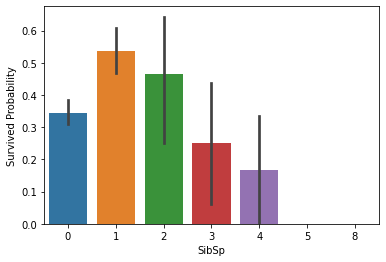

In [129]:
sns.barplot(x = 'SibSp', y = 'Survived', data=df)
plt.ylabel("Survived Probability")
plt.show()

- Penumpang dengan `SibSp` 1 memiliki kesempatan selamat yang paling tinggi
- Penumpang dengan `SibSp` yang lebih tinggi memiliki kesempatan untuk selamat lebih rendah

### Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


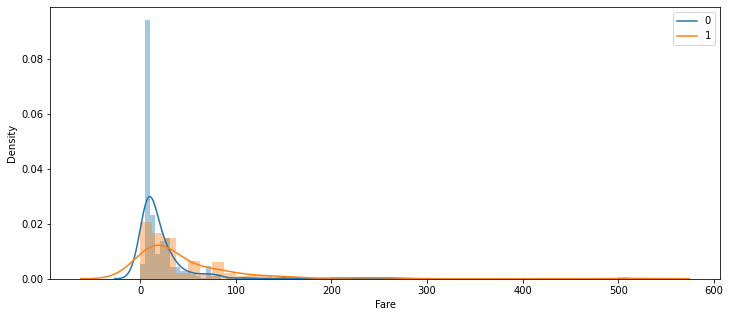

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


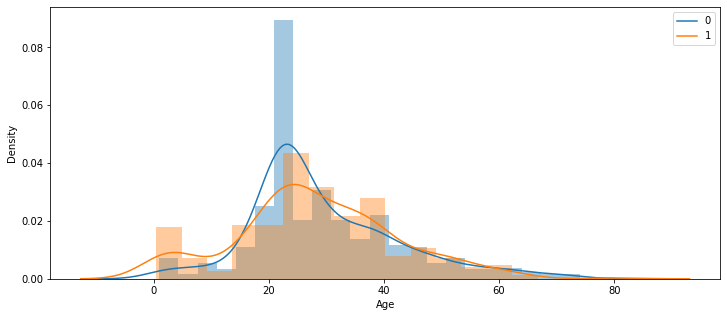

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


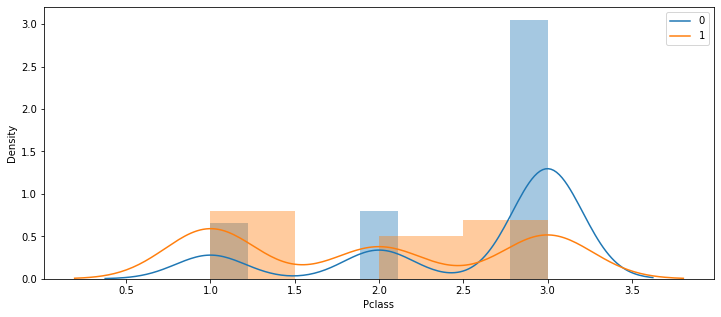

In [117]:
for col in ['Fare','Age','Pclass']:
    plt.figure(figsize=(12,5))
    sns.distplot(df[col][df.Survived==0]) #-> Bivariate condition
    sns.distplot(df[col][df.Survived==1])
    plt.legend(['0','1'])
    plt.show()

Note :
- `Fare` dan `Pclass` grafik cenderung balance, jadi tidak ada faktor yang mempengaruhi penumpang akankah dia selamat atau tidak
- `Age` memiliki titik cut off pada umur 30, orang yang selamat puncaknya berada pada umur 24 - 28, sedangkan umur 30 kebawah cenderung banyak yang selamat

### Jumlah penumpang berdasarkan `Pclass` dan `Embarked`

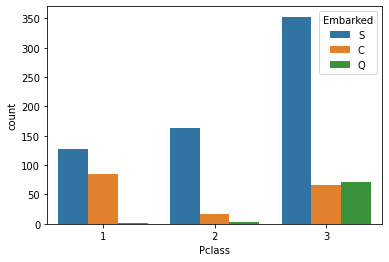

In [91]:
sns.countplot(x = 'Pclass', hue = 'Embarked' , data = df)

Note :

Pada chart diatas, dari berbagai Tipe Kelas yang telah muncul, dapat diketahui bahwa penumpang kapal Titanic paling banyak dari Tipe Kelas 3 dengan tujuan pelabuhan `Southampton`

### Jumlah penumpang yang `Died` & `Survived` berdasarkan `Age`

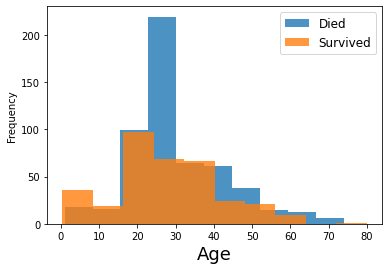

In [56]:
plt.figure()
fig = df.groupby('Survived')['Age'].plot.hist(histtype= 'bar', alpha = 0.8)
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('Age', fontsize = 18)
plt.show()

Note :
- Mayoritas penumpang yang meninggal yaitu pada umur 23 sampai dengan 30 tahun dengan frekuensi sebesar lebih dari 200 jiwa
- Penumpang dengan jumlah selamat terendah berada pada umur 65 tahun keatas
- Sebagian besar penumpang anak-anak banyak yang terselamatkan dibandingkan dengan umur yang lain

### Jumlah `Fare` yang dihabiskan penumpang berdasarkan `Pclass` dan `Sex`

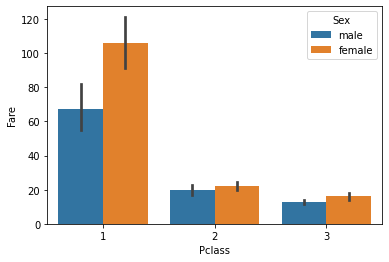

In [101]:
sns.barplot(x = 'Pclass', y = 'Fare', hue='Sex', data=df)

Note :

Dari berbagai Tiket Kelas yang tersedia, Beberapa penumpang baik laki-laki atau perempuan lebih banyak mengeluarkan uang untuk membeli Tiket Kelas 1 dibandingkan Tiket Kelas yang lain

### Persentase Penumpang berdasarkan `'Pclass', 'Survived', 'Sex'`

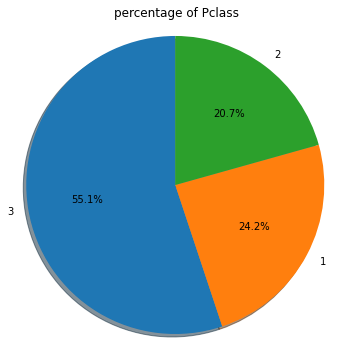

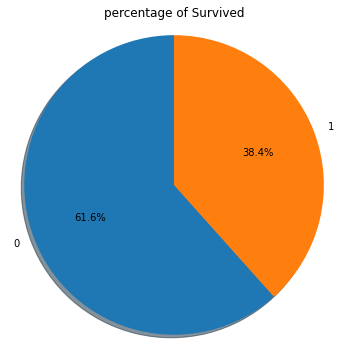

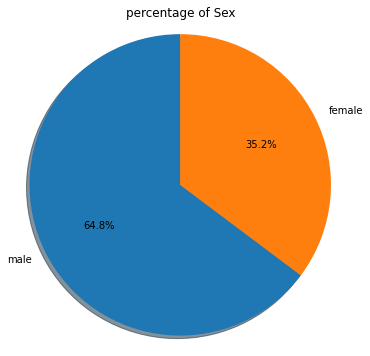

In [120]:
for col in ['Pclass', 'Survived', 'Sex']:
  plt.figure(figsize=(6,6))
  plt.pie(df[col].value_counts(), labels=df[col].unique(), autopct='%1.1f%%',
          shadow=True, startangle=90)
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title(f'percentage of {col}')

  plt.show()

Note :
1. Lebih dari 50% penumpang kapal Titanic merupakan penumpang dengan Tiket Kelas 3
2. Dari total penumpang keseluruhan, lebih dari 60% tidak selamat
3. Mayoritas penumpang kapal adalah laki-laki dengan persentase sebesar 64.8%   

### Pointplot

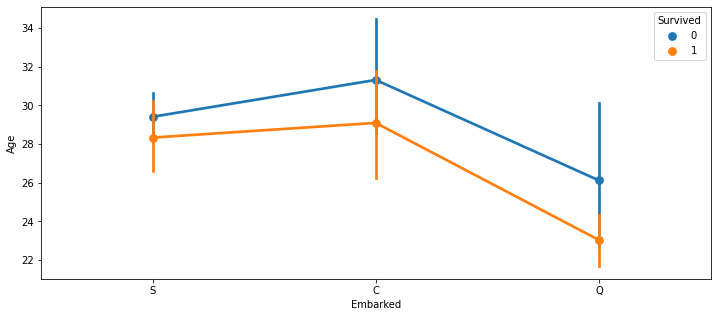

In [90]:
plt.figure(figsize=(12,5))
sns.pointplot(x='Embarked', y='Age',hue='Survived',data=df)
plt.show()

Klasifikasi Umur Menurut WHO :
- 17 - 25 Tahun -> Muda
- 26 - 35 Tahun -> Dewasa


        Penumpang dewasa banyak yang tidak selamat daripada penumpang dengan umur muda, pola tersebut ada di seluruh 3 buah tujuan pelabuhan  

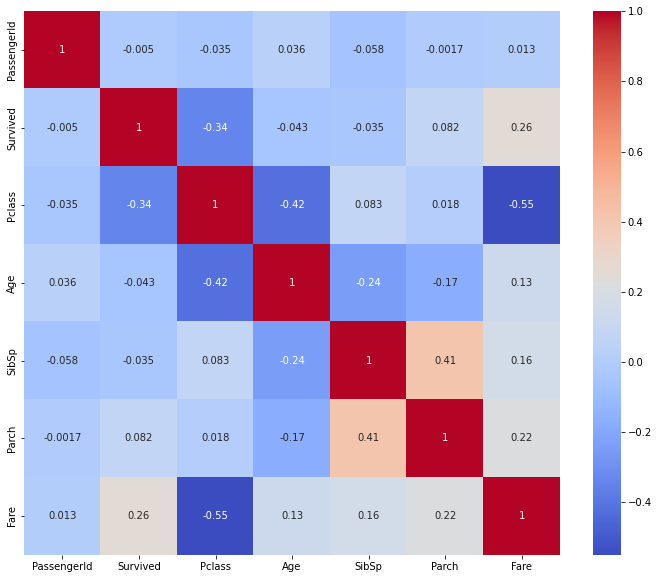

In [39]:
cor = df.corr() # to get the correlation matrix

# to visualize the correlation matrix we will use heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

- Survived memiliki nilai korelasi Positif dengan Fare
- Pclass memiliki korelasi Negatif dengan Survived